In [1]:
import snappy
from snappy import ProductIO
import datetime
import sys
import os
import gc
import calibrate
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ndbc_information = pd.read_csv('../ecmwf/ndbc_station_information.csv')

In [3]:
ndbc_information.head(5)

,name,height,lat,lon
0,0y2w3,10.0,44.794,-87.313
1,13001,4.0,12.000,-23.000
2,13002,4.0,21.000,-23.000
3,13008,4.0,15.000,-38.000
4,13009,4.0,8.000,-38.000


In [4]:
ndbc_information.describe()

,height,lat,lon
count,1521.000000,1521.000000,1521.000000
mean,11.386712,34.617180,-80.371899
std,15.610350,15.709595,60.558663
min,0.000000,-55.000000,-177.750000
25%,3.700000,27.765000,-117.174000
50%,5.000000,35.400000,-86.339000
75%,10.400000,43.810000,-75.300000
max,122.000000,71.758000,179.012000


In [9]:
east = ProductIO.readProduct('../ecmwf/east02.nc')

In [10]:
east_geo = east.getSceneGeoCoding()

In [18]:
p = east_geo.getPixelPos(calibrate.GeoPos(10.2, -50),None)
east.containsPixel(p)

True

In [27]:
uu = east.getBand('u10_time10')

In [34]:
u_ = np.zeros(1*1)

In [36]:
p.x

272.5

In [37]:
uu.readPixels(int(p.x), int(p.y), 1, 1, u_)

array([-5.25498913])

In [38]:
np.squeeze(u_)

array(-5.25498913)

In [50]:
def wind_filed_from_ndbc(station, times):
    time_string = str(times.year)+' '+str(times.month)+' '+str(times.day)+' '+str(times.hour)+' 00'
    with os.popen('cd /Volumes/Yangchao/data/ndbc/ \n grep "'+time_string+'" '+station+'*') as file:
        datas = file.readlines()
        if len(datas) == 0:
            return 0, 0
        else:
            for data in datas:
                wdir1 = data.split(':')[1][17:20]
                wspeed1 = data.split(':')[1][21:25]
            if wspeed1 =='0.0' or wdir1 == '999':
                return 0, 0
            return wdir1, wspeed1

In [59]:
station = []
time = []
v = []
u = []
wspeed = []
wdir = []
init = datetime.datetime(2015,11,1,0,0)
for t in tqdm(range(264, 3168)):
    times1 = init + datetime.timedelta(hours=t*6)
    u_10 = east.getBand('u10_time%d'%t)
    v_10 = east.getBand('v10_time%d'%t)
    for i , n in enumerate(ndbc_information['name']):
        p = east_geo.getPixelPos(calibrate.GeoPos(ndbc_information.loc[i, 'lat'], ndbc_information.loc[i, 'lon']), None)
        if east.containsPixel(p):
            wd, ws = wind_filed_from_ndbc(n, times1)
            if wd==0:
                continue
            print('----get----')
            u_ = np.zeros(1*1)
            v_ = np.zeros(1*1)
            u_10.readPixels(int(p.x), int(p.y), 1, 1, u_)
            v_10.readPixels(int(p.x), int(p.y), 1, 1, v_)
            station.append(n)
            time.append(time)
            v.append(np.squeeze(v_))
            u.append(np.squeeze(u_))
            wspeed.append(float(ws))
            wdir.append(int(wd))
            
            
    


  0%|          | 0/2904 [00:00<?, ?it/s]
Exception in thread Thread-3176:
Traceback (most recent call last):
  File "/Users/yangchao/anaconda/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Users/yangchao/anaconda/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/yangchao/anaconda/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

 38%|███▊      | 1114/2904 [9:06:42<14:38:27, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 38%|███▊      | 1115/2904 [9:07:12<14:37:59, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 38%|███▊      | 1116/2904 [9:07:42<14:37:31, 29.45s/it]

----get----


 38%|███▊      | 1118/2904 [9:08:41<14:36:32, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▊      | 1119/2904 [9:09:12<14:36:05, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▊      | 1120/2904 [9:09:42<14:35:36, 29.45s/it]

----get----


 39%|███▊      | 1122/2904 [9:10:42<14:34:39, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▊      | 1123/2904 [9:11:12<14:34:10, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▊      | 1124/2904 [9:11:42<14:33:41, 29.45s/it]

----get----


 39%|███▉      | 1126/2904 [9:12:41<14:32:42, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1127/2904 [9:13:10<14:32:13, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1128/2904 [9:13:40<14:31:45, 29.45s/it]

----get----


 39%|███▉      | 1130/2904 [9:14:40<14:30:46, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1131/2904 [9:15:10<14:30:18, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1132/2904 [9:15:40<14:29:49, 29.45s/it]

----get----


 39%|███▉      | 1134/2904 [9:16:39<14:28:51, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1135/2904 [9:17:09<14:28:23, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1136/2904 [9:17:39<14:27:54, 29.45s/it]

----get----


 39%|███▉      | 1138/2904 [9:18:38<14:26:55, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1139/2904 [9:19:07<14:26:25, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1140/2904 [9:19:37<14:25:56, 29.45s/it]

----get----


 39%|███▉      | 1142/2904 [9:20:37<14:24:59, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1143/2904 [9:21:06<14:24:30, 29.45s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1144/2904 [9:21:36<14:24:01, 29.46s/it]

----get----


 39%|███▉      | 1146/2904 [9:22:35<14:23:01, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 39%|███▉      | 1147/2904 [9:23:05<14:22:33, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|███▉      | 1148/2904 [9:23:35<14:22:04, 29.46s/it]

----get----


 40%|███▉      | 1150/2904 [9:24:36<14:21:08, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|███▉      | 1151/2904 [9:25:05<14:20:39, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|███▉      | 1152/2904 [9:25:36<14:20:11, 29.46s/it]

----get----


 40%|███▉      | 1154/2904 [9:26:35<14:19:12, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|███▉      | 1155/2904 [9:27:05<14:18:43, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|███▉      | 1156/2904 [9:27:35<14:18:15, 29.46s/it]

----get----


 40%|███▉      | 1158/2904 [9:28:34<14:17:16, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|███▉      | 1159/2904 [9:29:03<14:16:47, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|███▉      | 1160/2904 [9:29:33<14:16:17, 29.46s/it]

----get----


 40%|████      | 1162/2904 [9:30:33<14:15:20, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1163/2904 [9:31:02<14:14:51, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1164/2904 [9:31:31<14:14:21, 29.46s/it]

----get----


 40%|████      | 1166/2904 [9:32:30<14:13:21, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1167/2904 [9:33:00<14:12:52, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1168/2904 [9:33:30<14:12:23, 29.46s/it]

----get----


 40%|████      | 1170/2904 [9:34:29<14:11:26, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1171/2904 [9:35:00<14:10:58, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1172/2904 [9:35:30<14:10:29, 29.46s/it]

----get----


 40%|████      | 1174/2904 [9:36:29<14:09:30, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1175/2904 [9:37:00<14:09:02, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 40%|████      | 1176/2904 [9:37:29<14:08:34, 29.46s/it]

----get----


 41%|████      | 1178/2904 [9:38:29<14:07:35, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1179/2904 [9:38:59<14:07:06, 29.46s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1180/2904 [9:39:28<14:06:37, 29.47s/it]

----get----


 41%|████      | 1182/2904 [9:40:31<14:05:44, 29.47s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1183/2904 [9:41:02<14:05:16, 29.47s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1184/2904 [9:41:33<14:04:49, 29.47s/it]

----get----


 41%|████      | 1186/2904 [9:42:33<14:03:53, 29.47s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1187/2904 [9:43:04<14:03:25, 29.47s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1188/2904 [9:43:35<14:02:57, 29.47s/it]

----get----


 41%|████      | 1190/2904 [9:44:36<14:02:01, 29.48s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1191/2904 [9:45:06<14:01:33, 29.48s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----

 41%|████      | 1192/2904 [9:45:37<14:01:06, 29.48s/it]


----get----


 41%|████      | 1194/2904 [9:46:38<14:00:10, 29.48s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1195/2904 [9:47:09<13:59:42, 29.48s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████      | 1196/2904 [9:47:39<13:59:14, 29.48s/it]

----get----


 41%|████▏     | 1198/2904 [9:48:40<13:58:17, 29.48s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████▏     | 1199/2904 [9:49:11<13:57:49, 29.48s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 41%|████▏     | 1200/2904 [9:49:41<13:57:22, 29.48s/it]

----get----


 43%|████▎     | 1238/2904 [10:08:56<13:39:28, 29.51s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1239/2904 [10:09:27<13:39:00, 29.51s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1240/2904 [10:09:58<13:38:32, 29.51s/it]

----get----
----get----


 43%|████▎     | 1242/2904 [10:10:59<13:37:36, 29.52s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1243/2904 [10:11:30<13:37:08, 29.52s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1244/2904 [10:12:01<13:36:40, 29.52s/it]

----get----


 43%|████▎     | 1246/2904 [10:13:01<13:35:43, 29.52s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1247/2904 [10:13:32<13:35:15, 29.52s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1248/2904 [10:14:02<13:34:47, 29.52s/it]

----get----


 43%|████▎     | 1250/2904 [10:15:03<13:33:50, 29.52s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----

 43%|████▎     | 1251/2904 [10:15:34<13:33:22, 29.52s/it]


----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1252/2904 [10:16:04<13:32:54, 29.52s/it]

----get----


 43%|████▎     | 1254/2904 [10:17:05<13:31:58, 29.53s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1255/2904 [10:17:36<13:31:30, 29.53s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1256/2904 [10:18:07<13:31:02, 29.53s/it]

----get----


 43%|████▎     | 1258/2904 [10:19:08<13:30:05, 29.53s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1259/2904 [10:19:38<13:29:37, 29.53s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1260/2904 [10:20:10<13:29:10, 29.53s/it]

----get----


 43%|████▎     | 1262/2904 [10:21:10<13:28:12, 29.53s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 43%|████▎     | 1263/2904 [10:21:40<13:27:44, 29.53s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▎     | 1264/2904 [10:22:11<13:27:16, 29.53s/it]

----get----


 44%|████▎     | 1266/2904 [10:23:11<13:26:19, 29.54s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▎     | 1267/2904 [10:23:42<13:25:50, 29.54s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▎     | 1268/2904 [10:24:13<13:25:22, 29.54s/it]

----get----


 44%|████▎     | 1270/2904 [10:25:14<13:24:26, 29.54s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1271/2904 [10:25:45<13:23:58, 29.54s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1272/2904 [10:26:15<13:23:30, 29.54s/it]

----get----


 44%|████▍     | 1274/2904 [10:27:16<13:22:33, 29.54s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1275/2904 [10:27:47<13:22:05, 29.54s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1276/2904 [10:28:18<13:21:37, 29.54s/it]

----get----


 44%|████▍     | 1278/2904 [10:29:19<13:20:40, 29.55s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1279/2904 [10:29:49<13:20:12, 29.55s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1280/2904 [10:30:22<13:19:46, 29.55s/it]

----get----


 44%|████▍     | 1282/2904 [10:31:23<13:18:50, 29.55s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1283/2904 [10:31:54<13:18:22, 29.55s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1284/2904 [10:32:24<13:17:54, 29.55s/it]

----get----


 44%|████▍     | 1286/2904 [10:33:25<13:16:57, 29.55s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1287/2904 [10:33:56<13:16:29, 29.55s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1288/2904 [10:34:27<13:16:01, 29.56s/it]

----get----


 44%|████▍     | 1290/2904 [10:35:28<13:15:04, 29.56s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1291/2904 [10:35:59<13:14:37, 29.56s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 44%|████▍     | 1292/2904 [10:36:30<13:14:08, 29.56s/it]

----get----


 45%|████▍     | 1294/2904 [10:37:30<13:13:11, 29.56s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▍     | 1295/2904 [10:38:01<13:12:43, 29.56s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▍     | 1296/2904 [10:38:32<13:12:15, 29.56s/it]

----get----


 45%|████▍     | 1298/2904 [10:39:33<13:11:19, 29.56s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▍     | 1299/2904 [10:40:04<13:10:51, 29.56s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▍     | 1300/2904 [10:40:35<13:10:23, 29.57s/it]

----get----


 45%|████▍     | 1302/2904 [10:41:36<13:09:27, 29.57s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▍     | 1303/2904 [10:42:07<13:08:58, 29.57s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▍     | 1304/2904 [10:42:38<13:08:30, 29.57s/it]

----get----


 45%|████▍     | 1306/2904 [10:43:39<13:07:33, 29.57s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----

 45%|████▌     | 1307/2904 [10:44:10<13:07:05, 29.57s/it]


----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▌     | 1308/2904 [10:44:40<13:06:37, 29.57s/it]

----get----


 45%|████▌     | 1310/2904 [10:45:41<13:05:40, 29.57s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▌     | 1311/2904 [10:46:12<13:05:12, 29.57s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▌     | 1312/2904 [10:46:43<13:04:44, 29.58s/it]

----get----


 45%|████▌     | 1314/2904 [10:47:44<13:03:47, 29.58s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▌     | 1315/2904 [10:48:14<13:03:19, 29.58s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▌     | 1316/2904 [10:48:46<13:02:51, 29.58s/it]

----get----


 45%|████▌     | 1318/2904 [10:49:46<13:01:54, 29.58s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▌     | 1319/2904 [10:50:18<13:01:26, 29.58s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 45%|████▌     | 1320/2904 [10:50:48<13:00:58, 29.58s/it]

----get----


 47%|████▋     | 1358/2904 [11:10:07<12:42:53, 29.61s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1359/2904 [11:10:38<12:42:26, 29.61s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1360/2904 [11:11:09<12:41:57, 29.61s/it]

----get----


 47%|████▋     | 1362/2904 [11:12:10<12:41:00, 29.61s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----

 47%|████▋     | 1363/2904 [11:12:40<12:40:31, 29.61s/it]


----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1364/2904 [11:13:11<12:40:03, 29.61s/it]

----get----


 47%|████▋     | 1366/2904 [11:14:11<12:39:05, 29.61s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1367/2904 [11:14:42<12:38:36, 29.61s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1368/2904 [11:15:13<12:38:08, 29.61s/it]

----get----


 47%|████▋     | 1370/2904 [11:16:13<12:37:10, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1371/2904 [11:16:44<12:36:42, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1372/2904 [11:17:15<12:36:13, 29.62s/it]

----get----


 47%|████▋     | 1374/2904 [11:18:15<12:35:16, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1375/2904 [11:18:46<12:34:47, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1376/2904 [11:19:17<12:34:19, 29.62s/it]

----get----


 47%|████▋     | 1378/2904 [11:20:19<12:33:23, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 47%|████▋     | 1379/2904 [11:20:49<12:32:54, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1380/2904 [11:21:20<12:32:26, 29.62s/it]

----get----


 48%|████▊     | 1382/2904 [11:22:20<12:31:27, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1383/2904 [11:22:51<12:30:59, 29.62s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1384/2904 [11:23:23<12:30:32, 29.63s/it]

----get----


 48%|████▊     | 1386/2904 [11:24:25<12:29:36, 29.63s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1387/2904 [11:24:55<12:29:07, 29.63s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1388/2904 [11:25:26<12:28:39, 29.63s/it]

----get----


 48%|████▊     | 1390/2904 [11:26:27<12:27:42, 29.63s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1391/2904 [11:26:58<12:27:13, 29.63s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1392/2904 [11:27:29<12:26:45, 29.63s/it]

----get----


 48%|████▊     | 1394/2904 [11:28:30<12:25:47, 29.63s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1395/2904 [11:29:00<12:25:19, 29.64s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1396/2904 [11:29:32<12:24:51, 29.64s/it]

----get----


 48%|████▊     | 1398/2904 [11:30:33<12:23:54, 29.64s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1399/2904 [11:31:04<12:23:26, 29.64s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1400/2904 [11:31:35<12:22:57, 29.64s/it]

----get----


 48%|████▊     | 1402/2904 [11:32:36<12:22:00, 29.64s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1403/2904 [11:33:07<12:21:32, 29.64s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1404/2904 [11:33:38<12:21:03, 29.64s/it]

----get----


 48%|████▊     | 1406/2904 [11:34:38<12:20:06, 29.64s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1407/2904 [11:35:09<12:19:37, 29.64s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 48%|████▊     | 1408/2904 [11:35:40<12:19:09, 29.65s/it]

----get----


 49%|████▊     | 1410/2904 [11:36:41<12:18:11, 29.65s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▊     | 1411/2904 [11:37:12<12:17:43, 29.65s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▊     | 1412/2904 [11:37:42<12:17:14, 29.65s/it]

----get----


 49%|████▊     | 1414/2904 [11:38:43<12:16:17, 29.65s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▊     | 1415/2904 [11:39:14<12:15:48, 29.65s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1416/2904 [11:39:45<12:15:20, 29.65s/it]

----get----


 49%|████▉     | 1418/2904 [11:40:47<12:14:23, 29.65s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1419/2904 [11:41:17<12:13:54, 29.65s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1420/2904 [11:41:48<12:13:26, 29.65s/it]

----get----


 49%|████▉     | 1422/2904 [11:42:49<12:12:28, 29.65s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1423/2904 [11:43:19<12:11:59, 29.66s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1424/2904 [11:43:50<12:11:30, 29.66s/it]

----get----


 49%|████▉     | 1426/2904 [11:44:51<12:10:33, 29.66s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1427/2904 [11:45:23<12:10:06, 29.66s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1428/2904 [11:45:54<12:09:37, 29.66s/it]

----get----


 49%|████▉     | 1430/2904 [11:46:55<12:08:40, 29.66s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1431/2904 [11:47:26<12:08:11, 29.66s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1432/2904 [11:47:56<12:07:43, 29.66s/it]

----get----


 49%|████▉     | 1434/2904 [11:48:57<12:06:45, 29.66s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1435/2904 [11:49:28<12:06:17, 29.66s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 49%|████▉     | 1436/2904 [11:49:59<12:05:48, 29.67s/it]

----get----


 50%|████▉     | 1438/2904 [11:51:00<12:04:51, 29.67s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 50%|████▉     | 1439/2904 [11:51:31<12:04:22, 29.67s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 50%|████▉     | 1440/2904 [11:52:01<12:03:53, 29.67s/it]

----get----


 50%|████▉     | 1442/2904 [11:53:03<12:02:56, 29.67s/it]

----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----

 50%|████▉     | 1443/2904 [11:53:34<12:02:28, 29.67s/it]


----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----
----get----


 50%|████▉     | 1444/2904 [11:54:04<12:01:59, 29.67s/it]

----get----


 72%|███████▏  | 2077/2904 [17:16:55<6:52:52, 29.95s/it] 


KeyboardInterrupt: 

In [64]:
ndbc_ecmwf=pd.DataFrame({'wspeed':wspeed, 'wdir':wdir, 'u':u, 'v':v, 'station':station})

In [82]:
ndbc_ecmwf.describe()

,wdir,wspeed,wspeed_ndbc
count,6591.000000,6591.000000,6591.000000
mean,175.015476,6.396465,6.061885
std,112.056984,3.456337,3.067343
min,0.000000,0.000000,0.016224
25%,67.000000,3.700000,3.574615
50%,180.000000,6.000000,5.732049
75%,281.000000,8.700000,8.078024
max,360.000000,21.800000,18.765951


In [66]:
ndbc_ecmwf.info

<bound method DataFrame.info of      station                      u                     v  wdir  wspeed
0      41002    -0.3243312009397812    -12.52501343815635    22    12.1
1      41004     -4.956969023394812   -11.296759400114453    25    13.0
2      41013     -2.958053644981945    -12.68616733676469     9    11.3
3      41025     0.2935153705696507   -14.944499672667973     6    13.1
4      41040       -8.2327673162605    -1.102686435443978    81     9.3
5      41048      8.911869311193357   -3.1192879234347615   338    12.8
6      41049     -9.315816012200564     9.489915764974132   123    13.9
7      42022     -7.513157780031868    -4.717760377198516    77     9.4
8      42023     -6.875927786671163    -4.874558765033651    61     7.5
9      42058     -6.187816310950858    0.5545854137579518    76     5.5
10     42088     -5.468206774722226    3.6883754150740806    92     2.7
11     42089     -5.126573964593476    -5.601929064157758    75     7.4
12     42090     1.0325083286495

In [55]:
ndbc_ecmwf.head(5)

KeyboardInterrupt: 

In [57]:
gc.collect()

1847

In [74]:
ndbc_ecmwf['wspeed_ndbc']=np.sqrt(np.power(ndbc_ecmwf['u'].astype('float'),2)+np.power(ndbc_ecmwf['v'].astype('float'),2))

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

In [87]:
ndbc_ecmwf['wspeed'].astype('float', copy=True)

0       12.1
1       13.0
2       11.3
3       13.1
4        9.3
5       12.8
6       13.9
7        9.4
8        7.5
9        5.5
10       2.7
11       7.4
12       1.9
13      15.8
14      12.2
15      13.3
16      12.7
17      13.7
18      16.8
19      15.1
20      13.0
21      15.4
22       4.1
23       8.3
24       9.3
25       6.9
26       5.0
27       7.4
28      12.1
29       7.0
        ... 
6561     7.1
6562     7.3
6563     8.3
6564     9.5
6565     5.4
6566     8.8
6567    11.0
6568     4.6
6569     7.2
6570     8.2
6571     8.3
6572    12.4
6573     7.6
6574     7.4
6575     8.2
6576     2.8
6577     6.6
6578     6.0
6579     8.3
6580     8.8
6581     3.6
6582    11.1
6583    11.1
6584     6.3
6585     3.4
6586     7.0
6587     2.8
6588     6.8
6589     8.5
6590     8.9
Name: wspeed, Length: 6591, dtype: float64

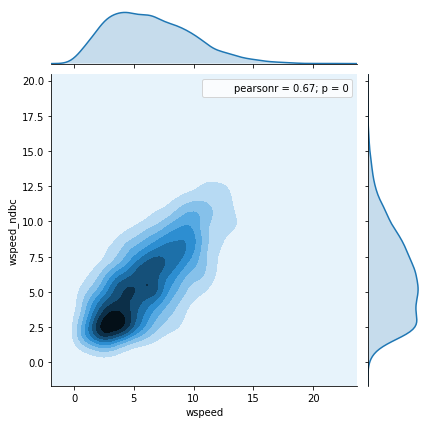

In [96]:
sns.jointplot(x='wspeed', y='wspeed_ndbc', data=ndbc_ecmwf,kind='kde')

In [2]:
ndbc_ecmwf = pd.read_csv('./ecmwf_ndbc.csv')

In [3]:
ndbc_ecmwf.head(5)

,Unnamed: 0,u,v,wdir,wspeed,name,height,lat,lon,c_wspeed,c_wspeed1,c_wspeed2,wspeed_ecmwf,wdir_ecmwf
0,0,-0.324331,-12.525013,22,12.1,41002,5.0,31.76,-74.84,13.058662,13.142182,12.906367,12.529212,-178.516676
1,1,-3.006512,-11.969686,17,11.1,41002,5.0,31.76,-74.84,11.979433,12.056051,11.839725,12.341495,-165.900293
2,2,-8.877266,-8.139014,51,12.1,41002,5.0,31.76,-74.84,13.058662,13.142182,12.906367,12.043646,-132.515778
3,3,-9.994236,-8.818474,46,11.3,41002,5.0,31.76,-74.84,12.195279,12.273277,12.053054,13.328549,-131.423764
4,4,-9.659872,-4.763493,62,10.6,41002,5.0,31.76,-74.84,11.439819,11.512986,11.306404,10.770515,-116.248911


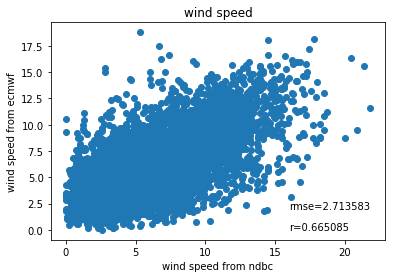

In [16]:
plt.scatter(ndbc_ecmwf['wspeed'], ndbc_ecmwf['wspeed_ecmwf'])
plt.text(16,0,'r=%f'%np.corrcoef(ndbc_ecmwf['wspeed'], ndbc_ecmwf['wspeed_ecmwf'])[0,1],fontsize=10)
plt.text(16,2,'rmse=%f'%np.sqrt(np.sum(np.power(ndbc_ecmwf['wspeed'] - ndbc_ecmwf['wspeed_ecmwf'], 2))/len(ndbc_ecmwf['wspeed'])),fontsize=10)
plt.xlabel('wind speed from ndbc')
plt.ylabel('wind speed from ecmwf')
plt.title('wind speed')
plt.savefig('wspeed_ecmwf_ndbc.eps')

In [98]:
np.corrcoef(ndbc_ecmwf['wspeed'], ndbc_ecmwf['wspeed_ndbc'])

array([[1.        , 0.66508536],
       [0.66508536, 1.        ]])

In [99]:
np.sqrt(np.sum(np.power(ndbc_ecmwf['wspeed']*np. - ndbc_ecmwf['wspeed_ndbc'], 2))/len(ndbc_ecmwf['wspeed']))

2.7135834717787217

In [103]:
station_information = pd.read_csv('../ecmwf/ndbc_station_information.csv')

In [106]:
s_i = station_information.set_index('name')

In [117]:
new['c_wspeed'] = new['wspeed']*np.power(10/new['height'], 0.11)

In [108]:
ndbc_ecmwf['name'] = ndbc_ecmwf['station']

In [111]:
new = pd.merge(ndbc_ecmwf, station_information, on='name')

In [115]:
new[100:110]

,station,u,v,wdir,wspeed,wspeed_ndbc,name,height,lat,lon
100,41002,-4.84309142001856,7.902332088143375,137,9.8,9.268354,41002,5.0,31.76,-74.84
101,41002,-2.6018832684647464,8.104863339097093,151,11.5,8.512262,41002,5.0,31.76,-74.84
102,41002,-0.5278571303781874,10.26301892721682,160,9.5,10.276585,41002,5.0,31.76,-74.84
103,41002,-0.2177223807577633,11.576205425336088,171,9.9,11.578253,41002,5.0,31.76,-74.84
104,41002,1.9023393842255771,7.190206076725463,267,2.5,7.437604,41002,5.0,31.76,-74.84
105,41002,2.3626956531933914,8.464192977885947,219,8.2,8.787770,41002,5.0,31.76,-74.84
106,41002,2.260932688474192,1.726217811748274,256,3.7,2.844582,41002,5.0,31.76,-74.84
107,41002,4.046630426523016,-0.32740551781469307,264,4.3,4.059854,41002,5.0,31.76,-74.84
108,41002,4.4924491291023685,-6.131123623101345,335,7.0,7.600840,41002,5.0,31.76,-74.84
109,41002,1.093081521934792,-7.3354223518906565,2,5.7,7.416417,41002,5.0,31.76,-74.84


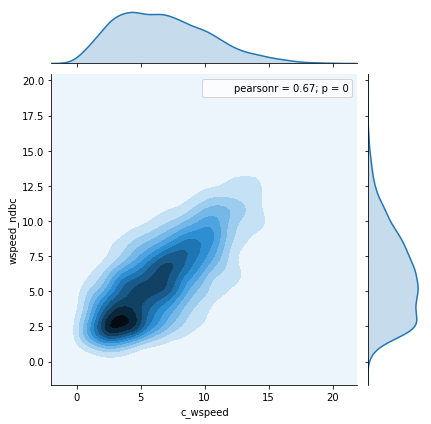

In [118]:
sns.jointplot(x='c_wspeed', y='wspeed_ndbc', data=new, kind='kde')

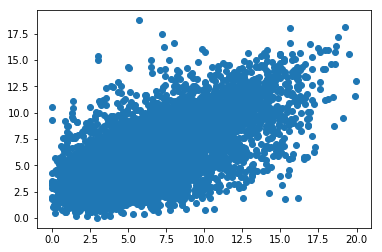

In [120]:
plt.scatter(new['c_wspeed'], new['wspeed_ndbc'])

In [121]:
np.sqrt(np.sum(np.power(new['c_wspeed'] - new['wspeed_ndbc'], 2))/len(new['c_wspeed']))

2.836484727916713

U10 =8.7403×UZ/ln(z/0.0016)

In [122]:
new['c_wspeed1'] = 8.7403*new['wspeed']/np.log(new['height']/0.0016)

In [123]:
np.sqrt(np.sum(np.power(new['c_wspeed1'] - new['wspeed_ndbc'], 2))/len(new['c_wspeed']))

2.872650092768478


U10/ U5  = ln(10/z0 )/ln(5/z0 )

In [124]:
new['c_wspeed2'] = new['wspeed']*np.log(10/0.000152)/np.log(new['height']/0.000152)

1.52*10-4

In [125]:
np.sqrt(np.sum(np.power(new['c_wspeed2'] - new['wspeed_ndbc'], 2))/len(new['c_wspeed']))

2.8131225005696847

In [126]:
new['wspeed_ecmwf'] = new['wspeed_ndbc']

In [127]:
del new['wspeed_ndbc']

In [128]:
del new['station']

In [130]:
new.describe()

,wdir,wspeed,height,lat,lon,c_wspeed,c_wspeed1,c_wspeed2,wspeed_ecmwf
count,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000,6591.000000
mean,175.015476,6.396465,8.026635,34.532124,-75.549873,6.749614,6.801944,6.703389,6.061885
std,112.056984,3.456337,7.801011,8.493070,6.309377,3.591304,3.618922,3.568295,3.067343
min,0.000000,0.000000,1.000000,11.301000,-83.741000,0.000000,0.000000,0.000000,0.016224
25%,67.000000,3.700000,3.350000,29.136000,-80.864000,3.944321,3.961651,3.926067,3.574615
50%,180.000000,6.000000,5.000000,37.211000,-76.391000,6.394741,6.466467,6.372053,5.732049
75%,281.000000,8.700000,9.800000,41.550000,-71.033000,9.173440,9.232111,9.076460,8.078024
max,360.000000,21.800000,43.900000,45.351000,-53.073000,19.965722,20.093419,20.285047,18.765951


In [199]:
wd_e = np.arctan(new['u'].astype('float')/new['v'].astype('float'))*180/np.pi

In [210]:
wdd = []
for u, v in zip(new['u'], new['v']):
    if v > 0:
        inc = ((180 / np.pi) * np.arctan(u/v) + 180)
    elif u < 0 and v < 0:
        inc = ((180 / np.pi) * np.arctan(u/v) + 0)
    elif u > 0 and v < 0:
        inc = ((180 / np.pi) * np.arctan(u/v) + 360)
    wdd.append(inc)

In [203]:
wdd = []
for i , w in enumerate(wd_e):
    if new['v'][i]<0:
        w+=180
        w%360
    else:
        w = w%360
    wdd.append(w)

In [206]:
wdd= np.array(wdd)

In [218]:
new['wdir_ecmwf'] = wddd

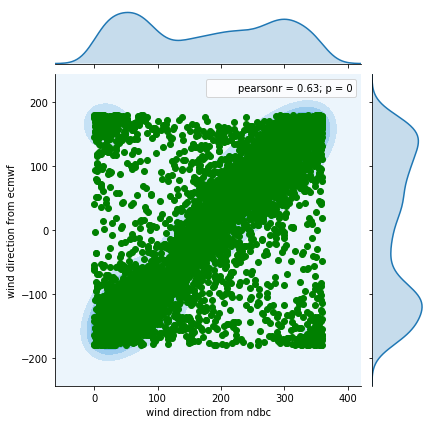

In [22]:
jp = sns.jointplot(x='wdir', y='wdir_ecmwf', data=ndbc_ecmwf, kind='kde')
jp.plot_joint(plt.scatter,c='g')
plt.xlabel('wind direction from ndbc')
plt.ylabel('wind direction from ecmwf')
plt.savefig('wdir_ecmwf_ndbc.eps')

In [154]:
np.arctan(7.902332088143375/-4.84309142001856)*180/np.pi+180

121.50282567429338

In [155]:
-50%360

310

In [170]:
new[100:120]

,u,v,wdir,wspeed,name,height,lat,lon,c_wspeed,c_wspeed1,c_wspeed2,wspeed_ecmwf,wdir_ecmwf
100,-4.84309142001856,7.902332088143375,137,9.8,41002,5.0,31.76,-74.84,10.576437,10.644081,10.453091,9.268354,121.502826
101,-2.6018832684647464,8.104863339097093,151,11.5,41002,5.0,31.76,-74.84,12.411125,12.490504,12.266382,8.512262,107.798054
102,-0.5278571303781874,10.26301892721682,160,9.5,41002,5.0,31.76,-74.84,10.252668,10.318242,10.133098,10.276585,92.944295
103,-0.2177223807577633,11.576205425336088,171,9.9,41002,5.0,31.76,-74.84,10.684360,10.752694,10.559755,11.578253,91.077478
104,1.9023393842255771,7.190206076725463,267,2.5,41002,5.0,31.76,-74.84,2.698071,2.715327,2.666605,7.437604,75.180598
105,2.3626956531933914,8.464192977885947,219,8.2,41002,5.0,31.76,-74.84,8.849672,8.906272,8.746464,8.787770,74.403451
106,2.260932688474192,1.726217811748274,256,3.7,41002,5.0,31.76,-74.84,3.993144,4.018684,3.946575,2.844582,37.361665
107,4.046630426523016,-0.32740551781469307,264,4.3,41002,5.0,31.76,-74.84,4.640681,4.670362,4.586560,4.059854,355.374378
108,4.4924491291023685,-6.131123623101345,335,7.0,41002,5.0,31.76,-74.84,7.554598,7.602915,7.466493,7.600840,306.231297
109,1.093081521934792,-7.3354223518906565,2,5.7,41002,5.0,31.76,-74.84,6.151601,6.190945,6.079859,7.416417,278.475514


In [17]:
def distance(d1, d2):
    if np.abs(d1-d2)>180:
        return 360-np.abs(d1-d2)
    else:
        return np.abs(d1-d2)

In [18]:
error = [] 
for e, n in zip(ndbc_ecmwf['wdir_ecmwf'], ndbc_ecmwf['wdir']):
    error.append(distance(e,n))

In [215]:
np.sqrt(np.sum(np.power(error, 2))/len(error))

47.45392160732933

In [217]:
wddd = np.arctan2(new['u'].astype('float'),new['v'].astype('float'))*180/np.pi

In [220]:
new.to_csv('./ecmwf_ndbc.csv')

In [86]:
dataset = ProductIO.readProduct('/Volumes/Yangchao/sar_ecmwf_mask/Ascending_S1A_IW_GRDH_1SDV_20160329T220922_20160329T220947_010590_00FC12_1189.dim')

In [87]:
names = dataset.getBandNames()

In [99]:
data_geo = dataset.getSceneGeoCoding()

In [102]:
data_geo.getPixelPos(snappy.PixelPos(0,1), None)

RuntimeError: no matching Java method overloads found

In [98]:
    maskg = dataset.getValidMask()

RuntimeError: no matching Java method overloads found

In [89]:
dd = maskg.get(names[0])

SyntaxError: invalid syntax (<ipython-input-90-6f19280f2bf5>, line 1)

In [82]:
names[0]

'u10_time2416'

In [91]:
ld = dataset.getBand(names[1])


In [92]:
size = dataset.getSceneRasterSize()

In [93]:
d = np.zeros(( size.width,size.height))

In [94]:
ld.readPixels(0,0,size.width,size.height, d)

array([[-4.84066849, -4.75344309, -4.67348648, -4.59352986, -4.51357325,
        -4.43603956, -4.35608295, -4.2737034 , -4.19132386, -4.09198382,
        -3.99264379, -3.89088082, -3.79154078],
       [-3.69220075, -3.60255242, -3.5129041 , -3.46444554, -3.41840991,
        -3.37237429, -3.32876159, -3.28272596, -3.24638205, -3.21246106,
        -3.21246106, -3.22215277, -3.23184448],
       [-3.24153619, -3.2512279 , -5.11688225, -5.02723393, -4.94485438,
        -4.86005191, -4.77767237, -4.69529283, -4.61049036, -4.52568789,
        -4.43361663, -4.33185367, -4.22766778],
       [-4.12590481, -4.02171892, -3.91995595, -3.83030763, -3.74792809,
        -3.69462368, -3.64374219, -3.59528364, -3.54440216, -3.49352067,
        -3.45959969, -3.42810162, -3.42083284],
       [-3.42083284, -3.42325577, -3.42325577, -3.4256787 , -5.39309602,
        -5.30344769, -5.21622229, -5.12899689, -5.04177149, -4.9545461 ,
        -4.8673207 , -4.77524944, -4.67833233],
       [-4.57172351, -4.465114

In [40]:
size = dataset.getSceneRasterSize()

In [43]:
size.height

15

In [44]:
size.width

28